In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import json
import math
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge

In [19]:
df2= pd.read_pickle('dataset_2.pkl')
df2.head(-8501)

,resources - non-renewable energy,removedChassis,machineCycleTime,deliveryVolume,maintenanceCost,resources - mineral extraction,ecosystem quality - terrestrial acidification & nutrification,steelPrice,human health - ozone layer depletion,deliveryPeriod,...,materialDensity,surfaceFinishing,designTime,mouldMaterialName,machineName,productionCost,maxDepth,memtiEngineValue,weightCavityProcessed,injectedMaterial_materozza
0,55c4af00-0439-40aa-ab0a-4f1a0fa16882,0,10000,25000,1500,40,50,0.15,6.6725,35e16aba-caff-4fc6-a8ed-ec620c0da77f,...,0.000561,0.00258,0.003998,0.000852,0.000016,0.001819,1.373808e-07,0.000032,0.001819,0.000873
1,55c4af00-0439-40aa-ab0a-4f1a0fa16882,0,10000,25000,1500,40,50,0.15,6.6725,35e16aba-caff-4fc6-a8ed-ec620c0da77f,...,0.000561,0.00258,0.003998,0.000852,0.000016,0.001819,1.373808e-07,0.000032,0.001819,0.000873
2,55c4af00-0439-40aa-ab0a-4f1a0fa16882,0,10000,40000,1500,40,50,0.15,6.6725,35e16aba-caff-4fc6-a8ed-ec620c0da77f,...,0.000561,0.00258,0.003998,0.000852,0.000016,0.001819,1.373808e-07,0.000032,0.001819,0.000873
3,55c4af00-0439-40aa-ab0a-4f1a0fa16882,0,10000,40000,1500,40,50,0.15,6.6725,35e16aba-caff-4fc6-a8ed-ec620c0da77f,...,0.000567,0.002585,0.004009,0.000853,0.000016,0.001825,1.378714e-07,0.000032,0.001825,0.000874
4,55c4af00-0439-40aa-ab0a-4f1a0fa16882,0,10000,55000,1500,40,50,0.15,6.6725,35e16aba-caff-4fc6-a8ed-ec620c0da77f,...,0.000599,0.002616,0.004075,0.000856,0.000016,0.001858,1.408204e-07,0.000032,0.001858,0.000878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11663,55c4af00-0439-40aa-ab0a-4f1a0fa16882,0,10000,55000,1500,40,50,0.15,6.6725,35e16aba-caff-4fc6-a8ed-ec620c0da77f,...,0.000561,0.00258,0.003998,0.000852,0.000016,0.001819,1.373808e-07,0.000032,0.001819,0.000873
11664,0.001789,1,10,100,25,0.000018,0,0,69493.360588,8f10d917-79d3-48e6-a834-7e1edbfe1840,...,1,30,0,1,38500,0,4.592874e-03,2,2000,15
11665,0.002491,1,10,100,25,0.000019,0,0,54493.360588,8f10d917-79d3-48e6-a834-7e1edbfe1840,...,1,30,0,1,38500,0,5.529964e-03,2,2000,15
11666,0.00223,1,10,100,25,0.000019,0,0,82493.360588,8f10d917-79d3-48e6-a834-7e1edbfe1840,...,1,30,0,1,38500,0,5.198468e-03,2,2000,15


In [26]:
pd.set_option('display.max_columns', None)


In [28]:
df2.head(2)

,resources - non-renewable energy,removedChassis,machineCycleTime,deliveryVolume,maintenanceCost,resources - mineral extraction,ecosystem quality - terrestrial acidification & nutrification,steelPrice,human health - ozone layer depletion,deliveryPeriod,gateDiameter,mouldValidationCost,materozzaVolume,hotRunnerCost,ecosystem quality - aquatic ecotoxicity,human health - photochemical oxidation,percentageLorry,percentageAircraft,injectionMouldingProcess,ecosystem quality - total,human health - total,cycleTime,setupTime,climate change - climate change,EUUSMacchina,CNMacchina,removedCavity,ecosystem quality - land occupation,percentageShip,percentageRecycledMaterial,injectedMaterialCost,human health - human toxicity,totalTransportationPercentage,totalDistance,human health - ionising radiation,nProdottiAnno,Cost,surfaceProcessingLocationCavity,productVolume,mouldDesignCostDisplay,climate change - total,maxWallThickness,tolerance,hourlyDesignCost,weightChassisProcessed,transportCost,runnersType,nAnniProduzione,human health - respiratory effects (inorganics),weightMould,warmupTime,numberOfCavities,ecosystem quality - terrestrial ecotoxicity,resources - total,percentageTrain,mouldTotalCost,hotRunner,manufacturingCost,injectedMaterial_product,surfaceProcessingLocationChassis,materialDensity,surfaceFinishing,designTime,mouldMaterialName,machineName,productionCost,maxDepth,memtiEngineValue,weightCavityProcessed,injectedMaterial_materozza
0,55c4af00-0439-40aa-ab0a-4f1a0fa16882,0,10000,25000,1500,40,50,0.15,6.6725,35e16aba-caff-4fc6-a8ed-ec620c0da77f,0.3,32,0.005495000000000001,6.677995,100,5,25,40,30,50,4000,8f10d917-79d3-48e6-a834-7e1edbfe1840,1,0,5,1,5,0,1,1,0.00105,0,0,360,10,8000,12,8f10d917-79d3-48e6-a834-7e1edbfe1840,5984ad89-00c1-446d-880c-dad9bbb81f02,094e332c4dcaacfd,-1,COLD,ABS,Horizontal 10 ton,Horizontal 10 ton,Horizontal 10 ton,1,15,30,10,2,2000,38500,50493.360588,0.000004,0.000804,0.000018,0.001357,0.000022,0.001374,0.000561,0.00258,0.003998,0.000852,0.000016,0.001819,1.373808e-07,0.000032,0.001819,0.000873
1,55c4af00-0439-40aa-ab0a-4f1a0fa16882,0,10000,25000,1500,40,50,0.15,6.6725,35e16aba-caff-4fc6-a8ed-ec620c0da77f,0.3,32,0.005495000000000001,6.677995,100,5,25,40,30,50,4000,8f10d917-79d3-48e6-a834-7e1edbfe1840,1,0,5,1,5,0,1,1,0.00105,0,0,360,10,8000,12,8f10d917-79d3-48e6-a834-7e1edbfe1840,5984ad89-00c1-446d-880c-dad9bbb81f02,094e332c4dcaacfd,-1,COLD,ABS,Horizontal 10 ton,Horizontal 10 ton,Horizontal 10 ton,1,15,30,10,2,2000,38500,50493.360588,0.000004,0.000804,0.000018,0.001357,0.000022,0.001374,0.000561,0.00258,0.003998,0.000852,0.000016,0.001819,1.373808e-07,0.000032,0.001819,0.000873


In [38]:
columns_to_convert = ['deliveryPeriod',  'cycleTime',
       'surfaceProcessingLocationCavity', 'productVolume', 'mouldDesignCostDisplay',
       'resources - non-renewable energy','maxWallThickness', 'tolerance', 'hourlyDesignCost',
       'weightChassisProcessed', 'transportCost']

In [30]:
df2 = df2.iloc[:11663]

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11663 entries, 0 to 11662
Data columns (total 70 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   resources - non-renewable energy                               11663 non-null  object 
 1   removedChassis                                                 11663 non-null  object 
 2   machineCycleTime                                               11663 non-null  object 
 3   deliveryVolume                                                 11663 non-null  object 
 4   maintenanceCost                                                11663 non-null  object 
 5   resources - mineral extraction                                 11663 non-null  object 
 6   ecosystem quality - terrestrial acidification & nutrification  11663 non-null  object 
 7   steelPrice                                                

In [32]:
df2.describe()

,maxDepth
count,1.166300e+04
mean,1.421964e-07
std,6.212382e-09
min,1.373808e-07
25%,1.378714e-07
50%,1.408204e-07
75%,1.467659e-07
max,1.527115e-07


In [33]:
df2.columns

Index(['resources - non-renewable energy', 'removedChassis',
       'machineCycleTime', 'deliveryVolume', 'maintenanceCost',
       'resources - mineral extraction',
       'ecosystem quality - terrestrial acidification & nutrification',
       'steelPrice', 'human health - ozone layer depletion', 'deliveryPeriod',
       'gateDiameter', 'mouldValidationCost', 'materozzaVolume',
       'hotRunnerCost', 'ecosystem quality - aquatic ecotoxicity',
       'human health - photochemical oxidation', 'percentageLorry',
       'percentageAircraft', 'injectionMouldingProcess',
       'ecosystem quality - total', 'human health - total', 'cycleTime',
       'setupTime', 'climate change - climate change', 'EUUSMacchina',
       'CNMacchina', 'removedCavity', 'ecosystem quality - land occupation',
       'percentageShip', 'percentageRecycledMaterial', 'injectedMaterialCost',
       'human health - human toxicity', 'totalTransportationPercentage',
       'totalDistance', 'human health - ionising radi

In [39]:
df2[columns_to_convert] = df2[columns_to_convert].astype(str)
#df2[df2.columns] = df2[df2.columns].astype(str)

In [40]:
label_encoder = LabelEncoder()
df2_encoded= df2.copy()

In [41]:
for col in columns_to_convert:
    df2_encoded[col] = label_encoder.fit_transform(df2_encoded[col]).astype(float)

In [42]:
df2_encoded.info()
df2_corr=df2_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11663 entries, 0 to 11662
Data columns (total 70 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   resources - non-renewable energy                               11663 non-null  float64
 1   removedChassis                                                 11663 non-null  object 
 2   machineCycleTime                                               11663 non-null  object 
 3   deliveryVolume                                                 11663 non-null  object 
 4   maintenanceCost                                                11663 non-null  object 
 5   resources - mineral extraction                                 11663 non-null  object 
 6   ecosystem quality - terrestrial acidification & nutrification  11663 non-null  object 
 7   steelPrice                                                

In [43]:
df2_corr[df2_corr.columns] = df2_corr[df2_corr.columns].astype(float)

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [45]:
# scaling the data
scaler = MinMaxScaler()
df2_scaled = pd.DataFrame(scaler.fit_transform(df2_corr), columns=df2_corr.columns, index=df2_corr.index)

In [46]:
data=df2_scaled.corr(numeric_only=False)
plt.figure(figsize = (200,100))
sns.heatmap(data=data, cmap="YlGnBu", annot=True)

<Axes: >

In [47]:
# Drop columns and rows with all NaN values
cleaned_corr_matrix = data.dropna(axis=1, how='all').dropna(axis=0, how='all')

print(cleaned_corr_matrix)


                                  deliveryVolume  mouldValidationCost  \
deliveryVolume                          1.000000            -0.000161   
mouldValidationCost                    -0.000161             1.000000   
resources - total                       1.000000            -0.000161   
percentageTrain                         0.000081            -0.720370   
mouldTotalCost                          0.000081            -0.720370   
hotRunner                               0.000081            -0.720370   
manufacturingCost                       0.000081            -0.720370   
injectedMaterial_product                0.000081            -0.720370   
surfaceProcessingLocationChassis        0.000081            -0.720370   
materialDensity                         0.000081            -0.720370   
surfaceFinishing                        0.000081            -0.720370   
designTime                              0.000081            -0.720370   
mouldMaterialName                       0.000081   

<Axes: >

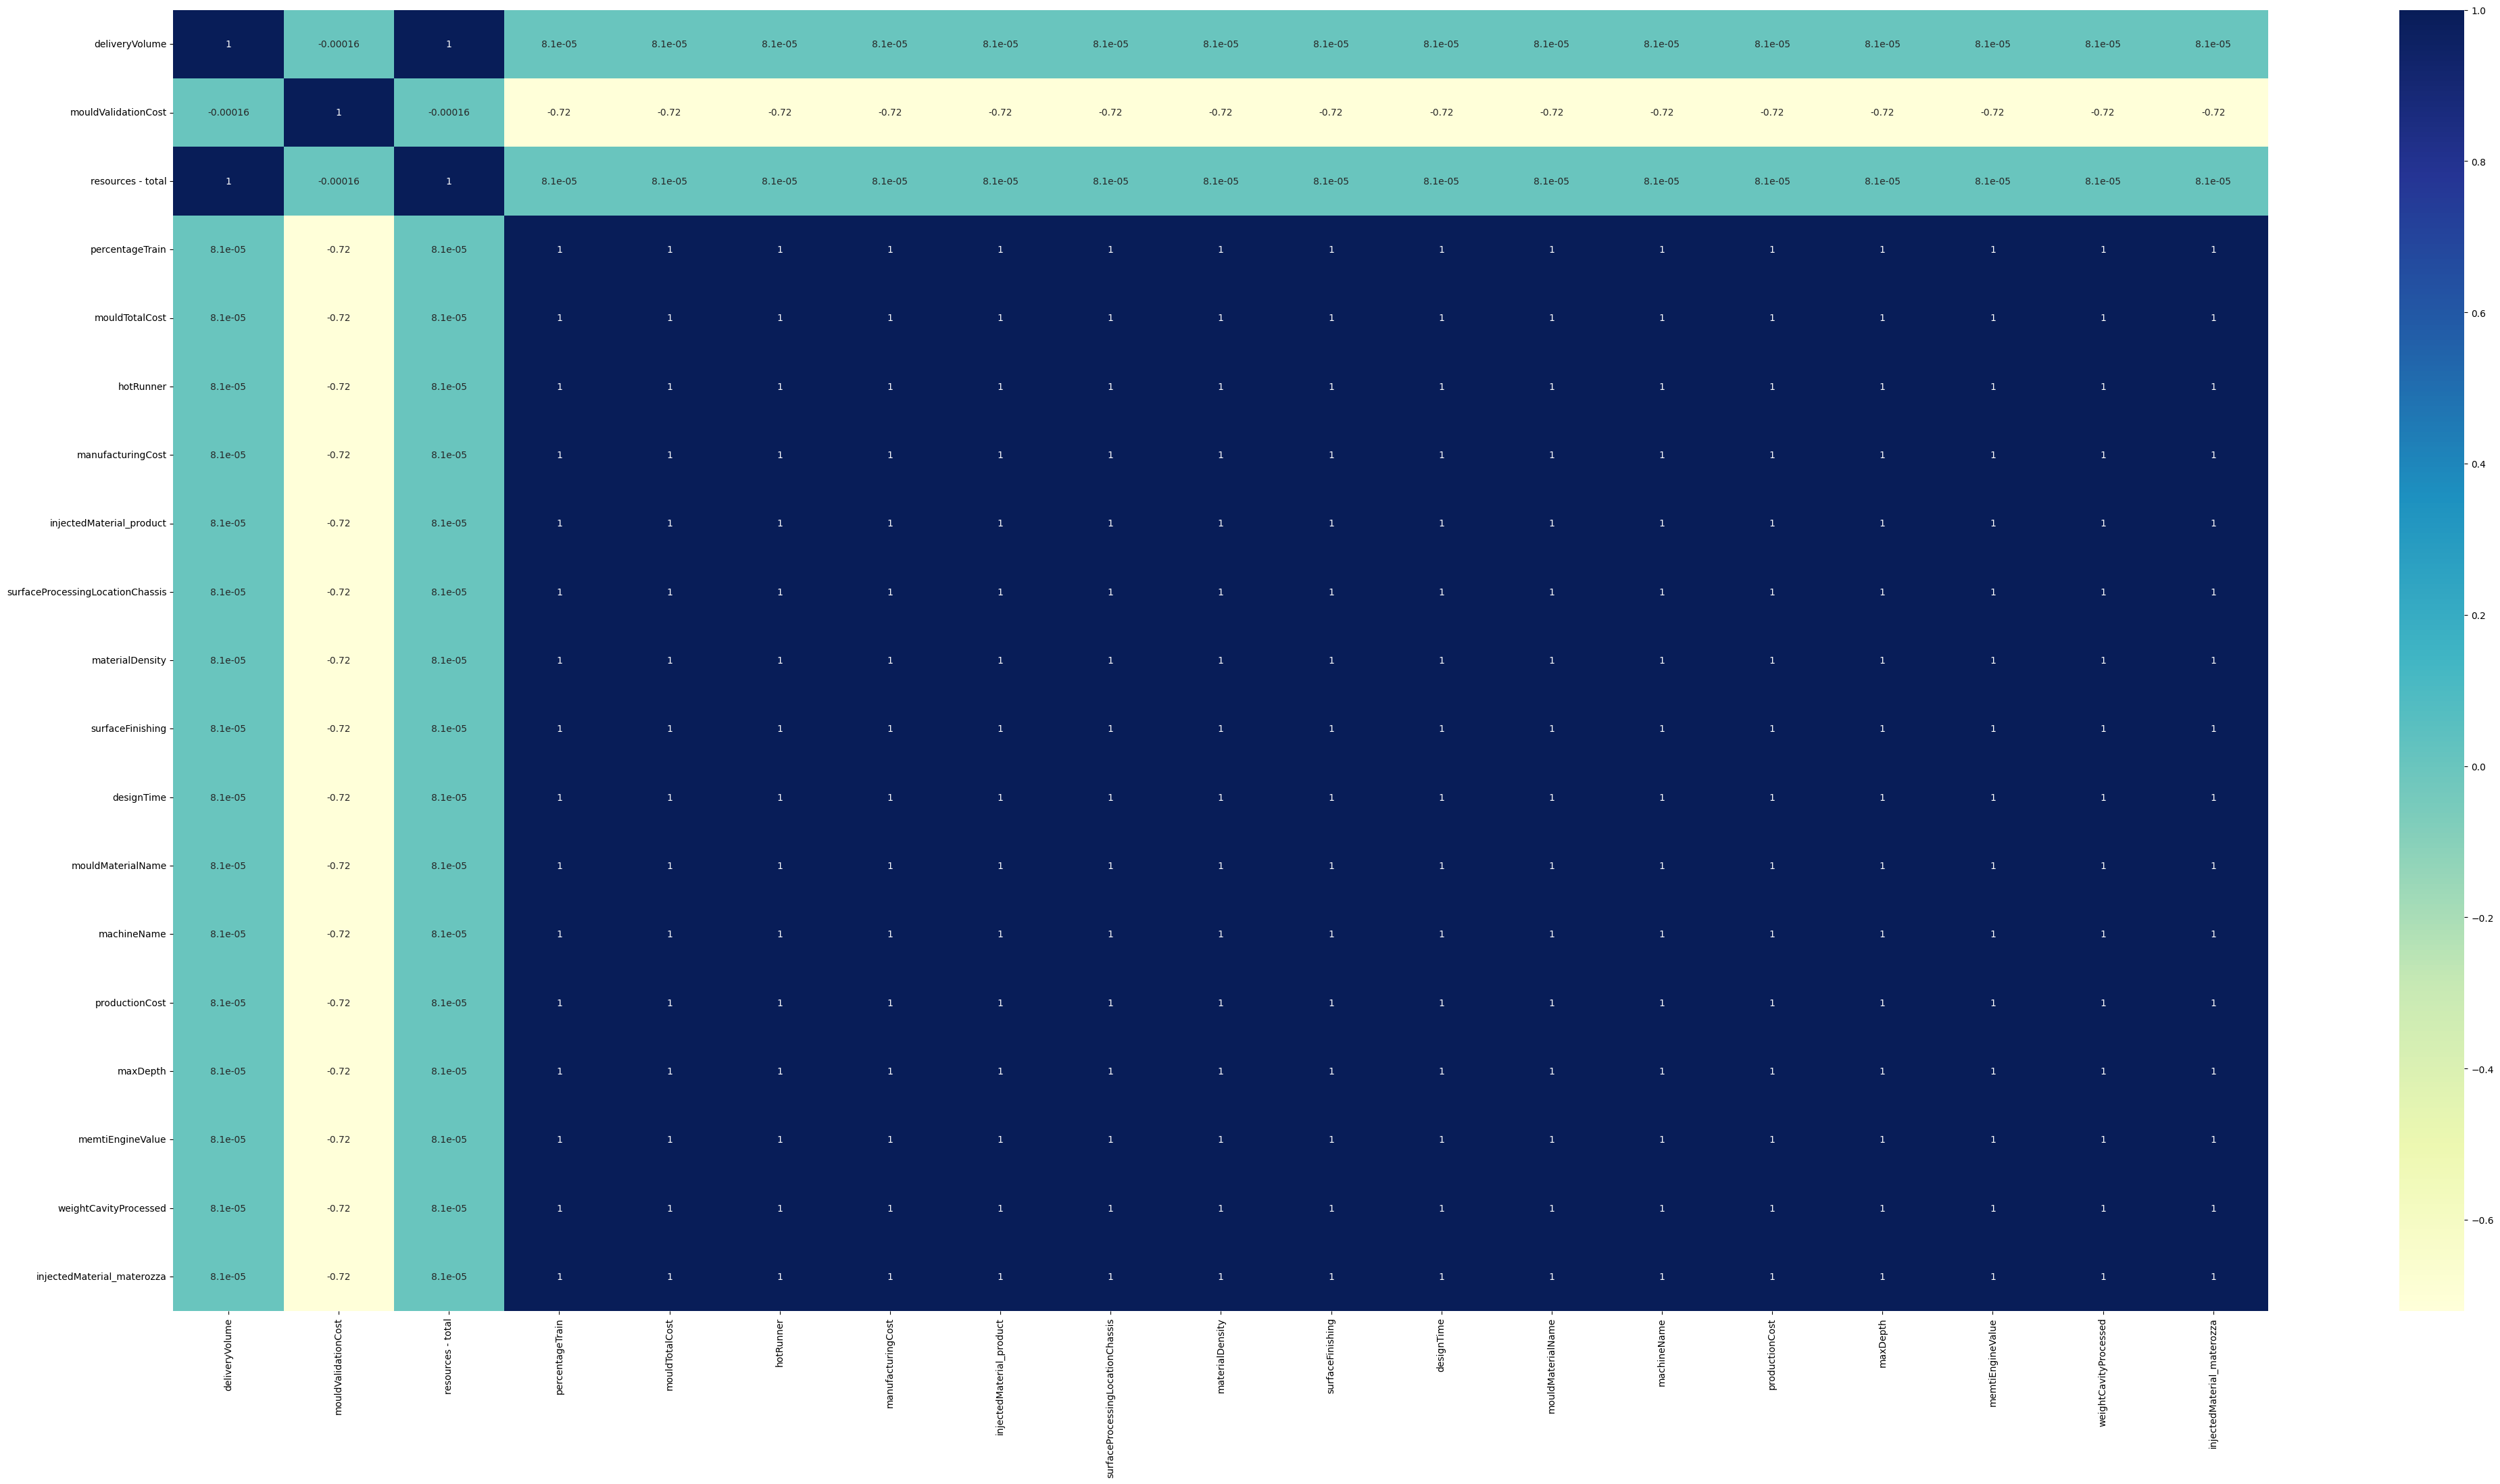

In [48]:
plt.figure(figsize = (50,25))
sns.heatmap(data=cleaned_corr_matrix, cmap="YlGnBu", annot=True)